# WeatherPy

### Observable Trends Based on the Data:
##### 1. As latitude increases in the southern hemisphere, the max temperature increases. As latitude increases in the northern hemisphere, the max temperature decreases. This is because as you increase latitude in the southern hemisphere, you get closer to the equator, and as you increase latitude in the northern hemisphere, you get further from the equator.
##### 2. There is a stronger correlation between latitude and max temperature in the northern hemisphere than the southern hemisphere. Other factors may be affecting temperature more in the southern hemisphere, such as ocean currents and moutains.
##### 3. There is not a strong correlation between latitude and cloudiness, latitude and humidity, and latitude and wind speed.
##### 4. Even though there is not a strong correlation between latitude and wind speed, it appears that high wind speeds (above 20-30 mph) mainly occur in areas far from the equator.

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets
import json
import os
import csv
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [167]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


594

In [171]:
cities

['yerbogachen',
 'nikolskoye',
 'sola',
 'cidreira',
 'belushya guba',
 'saint-pierre',
 'qaanaaq',
 'geraldton',
 'banjar',
 'mataura',
 'vaini',
 'eldikan',
 'fuling',
 'ushuaia',
 'airai',
 'saint george',
 'gorkovskiy',
 'jamestown',
 'rikitea',
 'cape town',
 'barrow',
 'udalguri',
 'sesheke',
 'victoria',
 'amderma',
 'halifax',
 'middelburg',
 'sao filipe',
 'bambous virieux',
 'houlton',
 'maloshuyka',
 'horadiz',
 'kaitangata',
 'albany',
 'steinbach',
 'saint anthony',
 'lorengau',
 'lompoc',
 'kodiak',
 'beira',
 'kapaa',
 'hithadhoo',
 'itarema',
 'hearst',
 'hanzhong',
 'birao',
 'katherine',
 'marmaris',
 'dikson',
 'taolanaro',
 'samusu',
 'sitka',
 'tandil',
 'tiznit',
 'kandrian',
 'lebu',
 'karratha',
 'nizhneyansk',
 'sentyabrskiy',
 'hobart',
 'kagoro',
 'broome',
 'colomi',
 'punta arenas',
 'eenhana',
 'busselton',
 'santa barbara',
 'touros',
 'bethel',
 'provideniya',
 'simpang',
 'longyearbyen',
 'narsaq',
 'tasiilaq',
 'mayo',
 'verkhnyaya sinyachikha',
 'new 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [169]:
print("Beginning Data Retrieval")
print("-----------------------------")

# set counters
counter1 = -1
counter2 = 1

# goes through each city, adds it to the url
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    url = url + city + "&appid=" + weather_api_key + "&units=imperial"
# if the city is found in the weather api, proceed, if not, there will be an error, so print different statement
    try:
# sets sleep timer so I don't go over my API limit
        time.sleep(1)
# get requset and json
        response = requests.get(url).json()
# if counter1 is under 51, keep it counter, if not, start it over. Also, prints statement with city name
        counter1 += 1
        if counter1 <= 50:
            print("Processing Record " + str(counter1) + " of Set " + str(counter2) + "| " + city)
        else:
            counter1 = 0
            counter2 += 1
            print("Processing Record " + str(counter1) + " of Set " + str(counter2) + "| " + city)
    except:
        print("City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1| yerbogachen
Processing Record 1 of Set 1| nikolskoye
Processing Record 2 of Set 1| sola
Processing Record 3 of Set 1| cidreira
Processing Record 4 of Set 1| belushya guba
Processing Record 5 of Set 1| saint-pierre
Processing Record 6 of Set 1| qaanaaq
Processing Record 7 of Set 1| geraldton
Processing Record 8 of Set 1| banjar
Processing Record 9 of Set 1| mataura
Processing Record 10 of Set 1| vaini
Processing Record 11 of Set 1| eldikan
Processing Record 12 of Set 1| fuling
Processing Record 13 of Set 1| ushuaia
Processing Record 14 of Set 1| airai
Processing Record 15 of Set 1| saint george
Processing Record 16 of Set 1| gorkovskiy
Processing Record 17 of Set 1| jamestown
Processing Record 18 of Set 1| rikitea
Processing Record 19 of Set 1| cape town
Processing Record 20 of Set 1| barrow
Processing Record 21 of Set 1| udalguri
Processing Record 22 of Set 1| sesheke
Processing Record 23 of Set 1| vic

Processing Record 45 of Set 4| canico
Processing Record 46 of Set 4| kintinku
Processing Record 47 of Set 4| aklavik
Processing Record 48 of Set 4| college
Processing Record 49 of Set 4| tuktoyaktuk
City not found. Skipping...
Processing Record 50 of Set 4| victor harbor
Processing Record 0 of Set 5| buala
Processing Record 1 of Set 5| cap malheureux
Processing Record 2 of Set 5| bud
Processing Record 3 of Set 5| roald
Processing Record 4 of Set 5| pangody
Processing Record 5 of Set 5| elizabeth city
Processing Record 6 of Set 5| souillac
Processing Record 7 of Set 5| kutahya
Processing Record 8 of Set 5| attawapiskat
Processing Record 9 of Set 5| mandera
Processing Record 10 of Set 5| zhigansk
Processing Record 11 of Set 5| chokurdakh
Processing Record 12 of Set 5| hami
Processing Record 13 of Set 5| oktyabrskiy
Processing Record 14 of Set 5| udachnyy
Processing Record 15 of Set 5| illoqqortoormiut
Processing Record 16 of Set 5| savannah bight
Processing Record 17 of Set 5| zhengjiatu

Processing Record 41 of Set 8| grand river south east
Processing Record 42 of Set 8| river falls
Processing Record 43 of Set 8| vanimo
Processing Record 44 of Set 8| vaitupu
Processing Record 45 of Set 8| saint albans
Processing Record 46 of Set 8| dwarahat
Processing Record 47 of Set 8| tessalit
Processing Record 48 of Set 8| bandarbeyla
Processing Record 49 of Set 8| ikongo
Processing Record 50 of Set 8| shemonaikha
Processing Record 0 of Set 9| olafsvik
Processing Record 1 of Set 9| alekseyevsk
Processing Record 2 of Set 9| satka
Processing Record 3 of Set 9| ossora
Processing Record 4 of Set 9| porto murtinho
Processing Record 5 of Set 9| khandbari
Processing Record 6 of Set 9| kegayli
Processing Record 7 of Set 9| russell
Processing Record 8 of Set 9| buchanan
Processing Record 9 of Set 9| ayagoz
Processing Record 10 of Set 9| jacqueville
Processing Record 11 of Set 9| linqing
Processing Record 12 of Set 9| wukari
Processing Record 13 of Set 9| ginda
Processing Record 14 of Set 9|

In [172]:
print(json.dumps(response,indent=4))

{
    "coord": {
        "lon": 98.35,
        "lat": 56.37
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 36.3,
        "feels_like": 28.49,
        "temp_min": 36.3,
        "temp_max": 36.3,
        "pressure": 1029,
        "humidity": 82,
        "sea_level": 1029,
        "grnd_level": 1002
    },
    "wind": {
        "speed": 7.36,
        "deg": 298
    },
    "snow": {
        "3h": 0.14
    },
    "clouds": {
        "all": 100
    },
    "dt": 1585959666,
    "sys": {
        "country": "RU",
        "sunrise": 1585954100,
        "sunset": 1586002224
    },
    "timezone": 28800,
    "id": 1492110,
    "name": "Shitkino",
    "cod": 200
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [173]:
# sets empty lists
name = []
cloudiness = []
humidity = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
error = []

# loops through each city, and adds it to the base url
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    new_url = url + city + "&appid=" + weather_api_key + "&units=imperial"
# if there is a working url for the city, add specified item to matching list. If not, there will be an error, so add it to the error list
    try:
        response = requests.get(new_url).json()
# sets sleep timer so I don't go over my API limit
        time.sleep(1)
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        time.sleep(1)
        error.append("error for " + city)


In [174]:
# check length of lists all match
# error list does not have to match the rest
print(len(name), len(cloudiness), len(humidity), len(country), len(date), len(latitude), len(longitude), len(max_temp), len(wind_speed), len(error))


553 553 553 553 553 553 553 553 553 41


In [175]:
# combines all the lists into a dataframe
cities_df = pd.DataFrame({
    "City":name,
    "Cloudiness":cloudiness,
    "Humidity":humidity,
    "Country":country,
    "Date":date,
    "Latitude":latitude,
    "Longitude":longitude,
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
})

cities_df


,City,Cloudiness,Humidity,Country,Date,Latitude,Longitude,Max Temperature,Wind Speed
0,Yerbogachën,83,87,RU,1585959573,61.28,108.01,30.76,14.16
1,Nikolskoye,90,74,RU,1585959767,59.70,30.79,33.80,11.18
2,Sola,100,87,VU,1585959767,-13.88,167.55,79.09,22.68
3,Cidreira,22,74,BR,1585959767,-30.18,-50.21,67.44,15.88
4,Saint-Pierre,90,94,RE,1585959767,-21.34,55.48,73.40,9.17
...,...,...,...,...,...,...,...,...,...
548,Tisul',53,95,RU,1585960626,55.76,88.31,29.66,2.28
549,Banda Aceh,97,83,ID,1585960627,5.56,95.32,80.15,7.78
550,Barhi,32,17,IN,1585960628,23.90,80.80,74.48,2.71
551,Burnie,100,70,AU,1585960629,-41.07,145.92,61.00,14.00


In [176]:
# exports df to csv file
cities_df.to_csv(output_data_file)
cities_df = pd.read_csv(output_data_file)

# changed unix time format into readable format
timestamp = datetime.datetime.fromtimestamp(cities_df["Date"][0]).strftime('%m/%d/%Y')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
###### The code below is analyzing the maximum temperatures of areas as they move closer and further from the equator. As the latitude in the southern hemisphere increases and gets closer the equator (latitude 0), the max temperature increases. As the latitude in the northern hemisphere increases and gets further from the equator, the max temperature decreases.

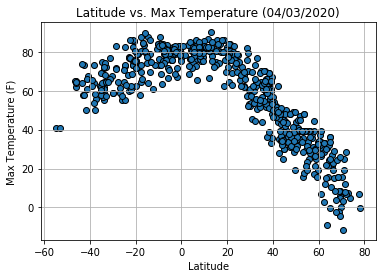

In [215]:
# plots scatter plot, adds labels, title, and a grid, then saves figure
plt.scatter(x = cities_df["Latitude"], y = cities_df["Max Temperature"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (" + timestamp + ")")
plt.grid()
plt.savefig("Figures/temp.png")
plt.show()


#### Latitude vs. Humidity Plot
###### The code below is analyzing the percent humidity of areas as they move closer and further from the equator. There does not appear to be a correlation between latitude and humidity based on this scatter plot.

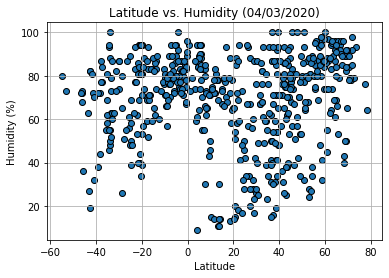

In [216]:
# plots scatter plot, adds labels, title, and a grid, then saves figure
plt.scatter(x = cities_df["Latitude"], y = cities_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (" + timestamp + ")")
plt.grid()
plt.savefig("Figures/humid.png")
plt.show()


#### Latitude vs. Cloudiness Plot
###### The code below is analyzing the percent cloudiness of areas as they move closer and further from the equator. There does not appear to be a correlation between latitude and cloudiness based on this scatter plot.

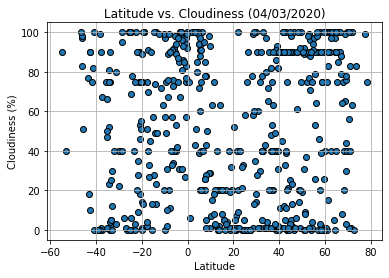

In [217]:
# plots scatter plot, adds labels, title, and a grid, then saves figure
plt.scatter(x = cities_df["Latitude"], y = cities_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (" + timestamp + ")")
plt.grid()
plt.savefig("Figures/cloud.png")
plt.show()


#### Latitude vs. Wind Speed Plot
###### The code below is analyzing the wind speed in mph of areas as they move closer and further from the equator. Based on the graph, it appears that only areas with very high wind speeds above 30 mph, are only found in areas with latitudes around 40 degrees and above.

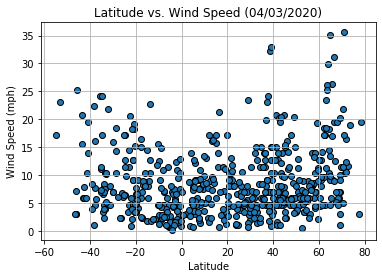

In [218]:
# plots scatter plot, adds labels, title, and a grid, then saves figure
plt.scatter(x = cities_df["Latitude"], y = cities_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (" + timestamp + ")")
plt.grid()
plt.savefig("Figures/wind.png")
plt.show()


## Linear Regression

In [219]:
# function to create Linear Regression plots

def regression(x_values, y_values, x_line_placement, y_line_placement, y_label, title, file_name):
    # Adds the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #stores regression line
    regress_values = x_values * slope + intercept
    # creates the formula of the line that will appear
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plots points
    plt.scatter(x_values,y_values)
    # plots regression line, ”r-“ makes the line a continuous
    plt.plot(x_values,regress_values,"r-")
    # makes the formula appear
    plt.annotate(line_eq,(x_line_placement, y_line_placement),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.savefig("Figures/" + file_name + ".png")
    plt.show()


In [182]:
# Creates Northern Hemisphere DataFrame by finding only latitudes above or equal to 0
northern_df = cities_df.loc[cities_df["Latitude"] >= 0, :]
northern_df


,Unnamed: 0,City,Cloudiness,Humidity,Country,Date,Latitude,Longitude,Max Temperature,Wind Speed
0,0,Yerbogachën,83,87,RU,1585959573,61.28,108.01,30.76,14.16
1,1,Nikolskoye,90,74,RU,1585959767,59.70,30.79,33.80,11.18
5,5,Qaanaaq,99,76,GL,1585959476,77.48,-69.36,7.03,2.98
10,10,Fuling,100,76,CN,1585959769,29.70,107.39,53.35,1.86
13,13,Saint George,1,16,US,1585959576,37.10,-113.58,66.20,6.93
...,...,...,...,...,...,...,...,...,...,...
547,547,Daman,0,65,IN,1585960625,20.42,72.85,77.56,2.59
548,548,Tisul',53,95,RU,1585960626,55.76,88.31,29.66,2.28
549,549,Banda Aceh,97,83,ID,1585960627,5.56,95.32,80.15,7.78
550,550,Barhi,32,17,IN,1585960628,23.90,80.80,74.48,2.71


In [183]:
# Creates Southern Hemisphere DataFrame by finding only latitudes less than 0
southern_df = cities_df.loc[cities_df["Latitude"] < 0, :]
southern_df


,Unnamed: 0,City,Cloudiness,Humidity,Country,Date,Latitude,Longitude,Max Temperature,Wind Speed
2,2,Sola,100,87,VU,1585959767,-13.88,167.55,79.09,22.68
3,3,Cidreira,22,74,BR,1585959767,-30.18,-50.21,67.44,15.88
4,4,Saint-Pierre,90,94,RE,1585959767,-21.34,55.48,73.40,9.17
6,6,Geraldton,95,26,AU,1585959768,-28.77,114.60,71.60,18.34
7,7,Banjar,20,89,ID,1585959768,-8.19,114.97,84.20,4.70
...,...,...,...,...,...,...,...,...,...,...
543,543,Chimbote,2,79,PE,1585960621,-9.09,-78.58,73.29,7.61
544,544,Kroya,90,81,ID,1585960622,-7.63,109.25,80.42,2.44
545,545,Turangi,0,38,NZ,1585960623,-39.00,175.93,65.32,4.00
546,546,Quatre Cocos,75,94,MU,1585960624,-20.21,57.76,75.20,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
###### The two linear regressions below are modeling the maximum temperatures of areas as they move closer (southern hemisphere) and further (norther hemisphere) from the equator. As the latitude in the southern hemisphere increases and gets closer the equator, the max temperature increases. As the latitude in the northern hemisphere increases and gets further from the equator, the max temperature decreases. Both hemisphere show a correlation between latitude and max temperature, but the correlation is almost twice as strong for the northern hemisphere than the southern hemisphere (shown in the r-squared values).

The r-squared value is: 0.8542417219049383


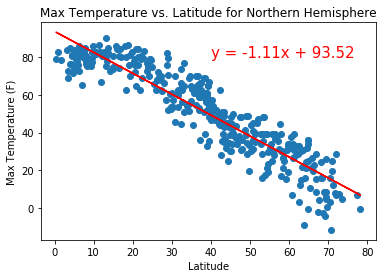

In [220]:
# calls the regression equation and passes in unique values for arguments
regression(northern_df["Latitude"], northern_df["Max Temperature"], 40, 80, "Max Temperature (F)", "Max Temperature vs. Latitude for Northern Hemisphere", "tempnorth")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.45004716754184587


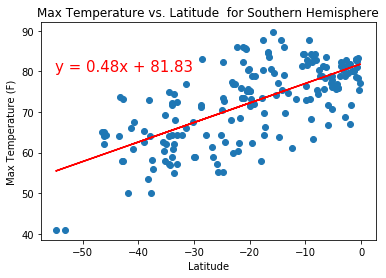

In [221]:
# calls the regression equation and passes in unique values for arguments
regression(southern_df["Latitude"], southern_df["Max Temperature"], -55, 80, "Max Temperature (F)", "Max Temperature vs. Latitude  for Southern Hemisphere", "tempsouth")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
###### The two linear regressions below are modeling the percent humidity of areas as they move closer (southern hemisphere) and further (norther hemisphere) from the equator. Although there is a stronger correlation between latitude and humidity in the souther hemisphere, neither hemisphere has a strong correlation, indicating that latitude probably does not affect humidity levels.

The r-squared value is: 0.05020305602768944


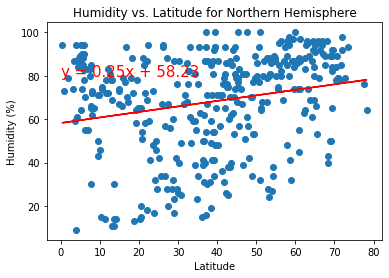

In [222]:
# calls the regression equation and passes in unique values for arguments
regression(northern_df["Latitude"], northern_df["Humidity"], 0, 80, "Humidity (%)", "Humidity vs. Latitude for Northern Hemisphere", "humidnorth")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1236628082097448


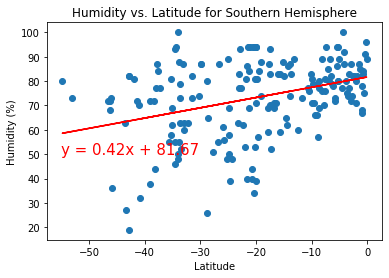

In [224]:
# calls the regression equation and passes in unique values for arguments
regression(southern_df["Latitude"], southern_df["Humidity"], -55, 50, "Humidity (%)", "Humidity vs. Latitude for Southern Hemisphere", "humidsouth")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
###### The two linear regressions below are modeling the percent cloudines of areas as they move closer (southern hemisphere) and further (norther hemisphere) from the equator. Neither hemisphere shows any correlation between latitude and cloudienss, indicating that latitude does not affect cloudiness levels.

The r-squared value is: 0.03958159158206524


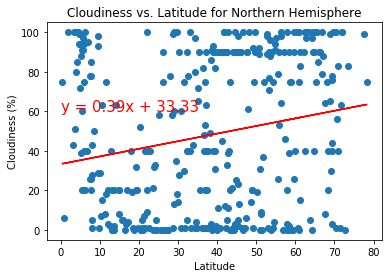

In [225]:
# calls the regression equation and passes in unique values for arguments
regression(northern_df["Latitude"], northern_df["Cloudiness"], 0, 60, "Cloudiness (%)", "Cloudiness vs. Latitude for Northern Hemisphere", "cloudnorth")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.053419133211472354


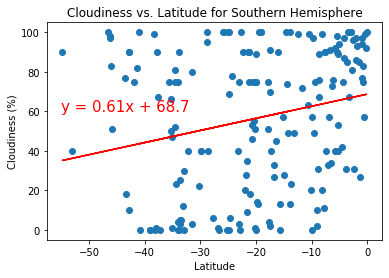

In [226]:
# calls the regression equation and passes in unique values for arguments
regression(southern_df["Latitude"], southern_df["Cloudiness"], -55, 60, "Cloudiness (%)", "Cloudiness vs. Latitude for Southern Hemisphere", "cloudsouth")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
###### The two linear regressions below are modeling the wind speed in mph of areas as they move closer (southern hemisphere) and further (norther hemisphere) from the equator. Although there is a stronger correlation between latitude and wind speed in the souther hemisphere, neither hemisphere has a strong correlation. However, it appears that very high wind speeds are only found in areas far from the equator.

The r-squared value is: 0.07928344779912626


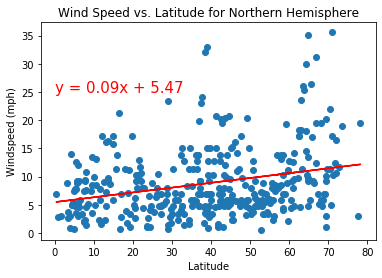

In [227]:
# calls the regression equation and passes in unique values for arguments
regression(northern_df["Latitude"], northern_df["Wind Speed"], 0, 25, "Windspeed (mph)", "Wind Speed vs. Latitude for Northern Hemisphere", "windnorth")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.13302990067252707


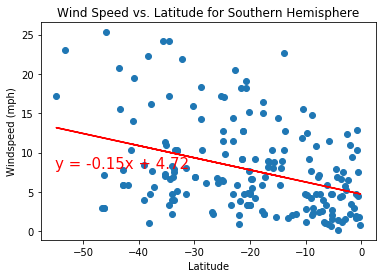

In [228]:
# calls the regression equation and passes in unique values for arguments
regression(southern_df["Latitude"], southern_df["Wind Speed"], -55, 8, "Windspeed (mph)", "Wind Speed vs. Latitude for Southern Hemisphere", "windsouth")
